# Analysis of Factors Influencing Median Annual Wages of Occupations


In [149]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import py_file as py
from sklearn import preprocessing
from statsmodels.stats import weightstats as weightstats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
sns.set_theme(style='whitegrid')


# Data Description:
The dataset is from U.S. Bureau of Labor Statistics(BLS), which contains presents data of employment by occupation (2019) and projection of employment for those occupations in 2029.  Due to the large number of variables in this dataset, the definition of each variable and its value will be shown in the following list of "Data Variables & Related Values Definitions". 

Here is the link of the dataset:

https://www.bls.gov/emp/tables/occupational-projections-and-characteristics.htm

https://www.bls.gov/emp/ind-occ-matrix/occupation.xlsx

# Goal:

***Our purpose of exploring this employment data is to find out which factors have the greatest impact on the level of annual median wage, so as to provide some reference for those people who are interested in working in the United States.*** 

***For example, some people might want to know what extent the education level will affact the wage? Does the work experience help to improve salary? What are the differences in the impac tof the work experience advantage in terms of wage levels by degree? What are the other secondary factors that affect wages?***

# Data Variables & Related Values Definitions


**2019 National Employment Matrix title and code.** Includes most categories of jobs title in the United States as of 2019. 

Occupation type: contains the classification of subordinate job categories.

Values: Summary, Line item

**Employment 2019 & 2029.** The number of employment in each occupation position in 2019 and the number of employment projected by the BLS to be in that position in 2029. 

Values: Numerical data

**Employment change, number.**  The numerical change in employment measures the projected number of job gains or losses.

Values: Numerical data

**Employment change, percent.** The percent change in employment measures the projected rate of change of employment in an occupation. A rapidly growing occupation may indicate favorable prospects for employment.

Values: Numerical data


**Median annual wages.** (Source: Occupational Employment Statistics (OES) survey) These are data on median annual wages for wage and salary employees in each occupation.

Values: Numerical data


**Typical education needed for entry.** This category best describes the typical level of education that most workers need to enter the occupation. 

Values(8 education levels in descending order):

***Doctoral or professional degree.*** Completion of a doctoral degree (Ph.D.) usually requires at least 3 years of full-time academic work beyond a bachelor's degree. 

***Master's degree.*** Completion of this degree usually requires 1 or 2 years of full-time academic study beyond a bachelor's degree. 

***Bachelor's degree.*** Completion of this degree generally requires at least 4 years, but not more than 5 years, of full-time academic study beyond high school. 

***Associate's degree.*** Completion of this degree usually requires at least 2 years but not more than 4 years of full-time academic study beyond high school. 

***Postsecondary nondegree award.*** These programs lead to a certificate or other award, but not a degree. The certificate is awarded by the educational institution and is the result of completing formal postsecondary schooling.  

***Some college, no degree.*** This category signifies the achievement of a high school diploma or equivalent plus the completion of one or more postsecondary courses that did not result in a degree or award. 

***High school diploma or equivalent.*** This category indicates the completion of high school or an equivalent program resulting in the award of a high school diploma or an equivalent, such as the General Education Development (GED) credential. 

***No formal educational credential.*** This category signifies that a formal credential issued by an educational institution, such as a high school diploma or postsecondary certificate, is not typically needed for entry into the occupation. 

**Work experience in a related occupation.** For some occupations, work experience in a related occupation may be a typical method of entry.  

Values(3 categories)：

***5 years or more.*** This is assigned to occupations if 5 or more years of work experience in a related occupation is typically needed for entry. 

***Less than 5 years.*** To enter occupations in this category, workers typically need less than 5 years of work experience in a related occupation. 

***None.*** No work experience in a related occupation is typically needed. 



## Catergory
  HeatMap:Examining the correlation between factors and Median Annual Wages in 2019 of occupations
  
**Main factors**

*   Education: Occupations Entry-level Qualifications (7 levels of education levels）
*   Work Experience: Minimum number of years of work required （More than 5/ Less than 5/None）

**Part 1. Education** 

For the listed occupations in general, the higher the Entry-level education need, the higher the Median Wage


> Education Attribute Composition: Bar Chart

> Data Support: Density Plot

> Hypothesis testing: one-way ANOVA & Tukey HSD

**Part 2. Work Exp**

For the listed occupations in general, the higher the threshold of years of Work Experience, the higher the Median Wage


> Work Experience Attribute Composition: Pie Chart

> Data Support: Bar Plot

> Hypothesis testing: Z-test


**Part 3. A combination of education and work experience**

For the listed occupations in general, Education level and Work Experience combine to influence Median Annual Wages

> Data Support: Violin Plot

> Hypothesis testing: ANOVA

**Part 4. Regression of Median Annual Wages**

Quantify all characteristics, find an correlation perdicting model with prediction tool: Random Forest

**Conlusion**

In [125]:
# import data
URL = 'https://www.bls.gov/emp/ind-occ-matrix/occupation.xlsx'
df = pd.read_excel(URL, sheet_name='Table 1.7', header=[1,2])
df.drop(df.tail(4).index, inplace=True) # delete irrelevant columns (the last 4 columns) before the analysis
df.head(5)

2019 National Employment Matrix title and code                     \
                              Unnamed: 0_level_1 Unnamed: 1_level_1   
0                         Total, all occupations            00-0000   
1                         Management occupations            11-0000   
2                                 Top executives            11-1000   
3                               Chief executives            11-1011   
4                General and operations managers            11-1021   

    Occupation\ntype Employment           Employment change, 2019-29          \
  Unnamed: 2_level_1       2019      2029                     Number Percent   
0            Summary   162795.6  168834.7                     6039.2     3.7   
1            Summary    10697.2   11202.2                      505.0     4.7   
2            Summary     2828.0    2946.3                      118.3     4.2   
3          Line item      287.9     259.1                      -28.7   -10.0   
4          Line item     2486.4    2630.2                      143.8     5.8   

  Percent self employed, 2019 Occupational openings, 2019-29 annual average  \
           Unnamed: 7_level_1                            Unnamed: 8_level_1   
0                         5.8                                       17454.3   
1                        18.6                                         843.0   
2                           3                                         222.2   
3                        24.2                                          13.9   
4                         0.6                                         204.4   

  Median annual wage, 2019(1) Typical education needed for entry  \
           Unnamed: 9_level_1                Unnamed: 10_level_1   
0                       39810                                  —   
1                      105660                                  —   
2                      103230                                  —   
3                      184460                  Bachelor's degree   
4                      100780                  Bachelor's degree   

  Work experience in a related occupation  \
                      Unnamed: 11_level_1   
0                                       —   
1                                       —   
2                                       —   
3                         5 years or more   
4                         5 years or more   

  Typical on-the-job training needed to attain competency in the occupation  
                                                        Unnamed: 12_level_1  
0                                                  —                         
1                                                  —                         
2                                                  —                         
3                                               None                         
4                                               None

This dataset contains both numerical and catagorical characteristic.
The name of columns are messed with title. Next step is to rename columns to make it understandable.

In [126]:
# Rename columns to make it understandable
col_rename = ['2019 National Employment Matrix title','Occupation Code','Occupation Type','2019 Employment','2029 Employment',
           'Number of Employment Change','Percent of Employment Change',
           '2019 Percent of self employed','Annual average of occupational openings',
           '2019 Median annual wage','Typical entry-level education need','Related occupation work experience need',
           'Typical on-the-job training needed to attain competency in the occupation']
df.columns = col_rename

According to Occupation Type, this dataset contains 'Summary' and 'Line item' data. Based on our goal, we pick up rows labeled 'Line item' as target data. Rename it as 'item_data'.

In [127]:
# Sort and pick up by 'line item', set as 'item_data' as our target dataset
item_data = df.loc[df['Occupation Type'] == 'Line item']
item_data.shape

(790, 13)

The dataset 'item_data' contains 790 rows and 13 columns

# Data Cleaning

In [128]:
# Check the data type of each characteristic
item_data.dtypes

2019 National Employment Matrix title                                         object
Occupation Code                                                               object
Occupation Type                                                               object
2019 Employment                                                              float64
2029 Employment                                                              float64
Number of Employment Change                                                  float64
Percent of Employment Change                                                 float64
2019 Percent of self employed                                                 object
Annual average of occupational openings                                      float64
2019 Median annual wage                                                       object
Typical entry-level education need                                            object
Related occupation work experience need                          

In general of the original dataset, numerical data type is 'float64', while categorical data type is 'object'. But there are several error. 

For example, '2019 Median annual wage' and '2019 Percent of self employed' should be numerical.

In [129]:
item_data = item_data.copy(deep=False)
 #  median wage '—' to 0
item_data['2019 Median annual wage'].replace('—',0,inplace = True)
 #  For those median wege higher than $208,000, set the value as 208000 
item_data['2019 Median annual wage'].replace('>=$208,000',208000,inplace = True)
#  self employed '—' to 0
item_data['2019 Percent of self employed'].replace('—',0,inplace = True)
# Transfer data type from string to integer 
item_data['2019 Median annual wage'].astype(int)

3       184460
4       100780
5        29270
7       125510
9       136850
         ...  
1043     45040
1044     55040
1045     37840
1046     42360
1047     31770
Name: 2019 Median annual wage, Length: 790, dtype: int32

 Here is the breif review for Median annual wage, and the datatype of the value is integer. 

In [130]:
# Check the shape of cleaned target dataset 'item_data'
item_data.shape

(790, 13)

Now the dateset 'item_data' contains 790 occupation and 13 columns of charcateristics that combines their information and the statistical variables.



In [131]:
# Check the final version of cleaned data type
item_data.dtypes

2019 National Employment Matrix title                                         object
Occupation Code                                                               object
Occupation Type                                                               object
2019 Employment                                                              float64
2029 Employment                                                              float64
Number of Employment Change                                                  float64
Percent of Employment Change                                                 float64
2019 Percent of self employed                                                float64
Annual average of occupational openings                                      float64
2019 Median annual wage                                                        int64
Typical entry-level education need                                            object
Related occupation work experience need                          

All numerical data has been transfered to float or integer.

All categorical data has been transfered to object. 

In [132]:
# Show the final version of data cleaning (5 rows from top of the dataset 'item_data')
item_data.head(5)

,2019 National Employment Matrix title,Occupation Code,Occupation Type,2019 Employment,2029 Employment,Number of Employment Change,Percent of Employment Change,2019 Percent of self employed,Annual average of occupational openings,2019 Median annual wage,Typical entry-level education need,Related occupation work experience need,Typical on-the-job training needed to attain competency in the occupation
3,Chief executives,11-1011,Line item,287.9,259.1,-28.7,-10.0,24.2,13.9,184460,Bachelor's degree,5 years or more,None
4,General and operations managers,11-1021,Line item,2486.4,2630.2,143.8,5.8,0.6,204.4,100780,Bachelor's degree,5 years or more,None
5,Legislators,11-1031,Line item,53.7,57.0,3.3,6.2,0.0,3.9,29270,Bachelor's degree,Less than 5 years,None
7,Advertising and promotions managers,11-2011,Line item,28.6,28.3,-0.3,-1.1,11.0,2.5,125510,Bachelor's degree,Less than 5 years,None
9,Marketing managers,11-2021,Line item,286.3,305.4,19.1,6.7,5.0,24.6,136850,Bachelor's degree,5 years or more,None


This is the result of the dataframe after cleanning. 

# **EDA**

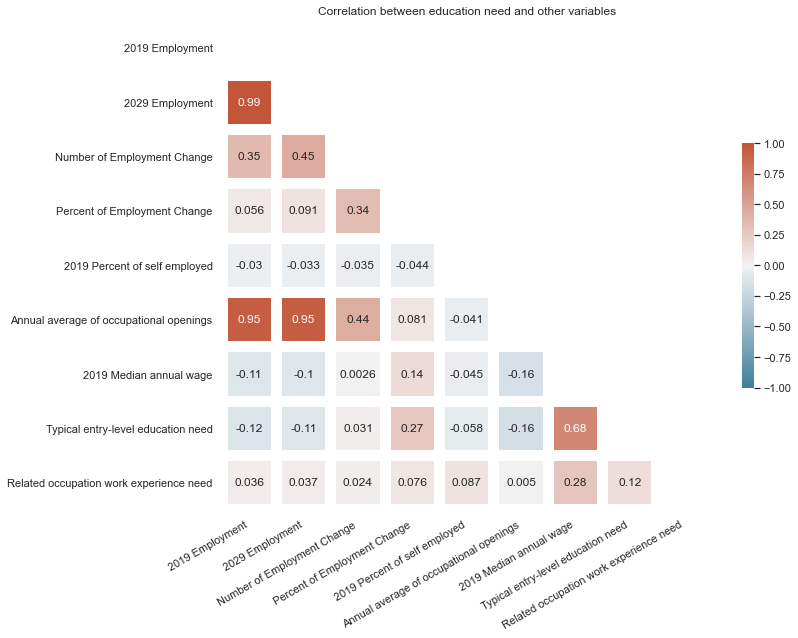

In [133]:
# HeatMap:Examining the correlation between factors and Median Annual Wages in 2019 of occupations
df1 = item_data.copy()
df1['Related occupation work experience need'].replace('—','None',inplace = True)
education = df1.copy()
education = education.replace({'Typical entry-level education need':{'No formal educational credential':1,
                                                   'High school diploma or equivalent':2,
                                                   'Some college, no degree':3,
                                                   'Postsecondary nondegree award':4,
                                                   "Associate's degree": 5,
                                                   "Bachelor's degree": 6,
                                                   "Master's degree": 7,
                                                   'Doctoral or professional degree': 8
                                                   }, 'Related occupation work experience need':{'None':0,'Less than 5 years':1, '5 years or more':2}})
py.Corr_heatmap(education,'Correlation between education need and other variables')

It is well know that occupations with high educational requirements usually mean high earnings, and this is still true today. According to the overall correlation map above, we can find that the correlation coeifficent between the entry-level education neeed and median annual wage is 0.69, which indicated that the occupations with high education requirements tend to have higher wage level. Meanwhile, it seems there still has a 0.28 correlation between work experience need and median annual wage. Therefore, in order to find out the relationship between these three variables, we stared the following analysis. 

# Part 1. Education

For the listed occupations in general, the higher the Entry-level education need, the higher the Median Wage

**1.1 Education Attribute Composition: Bar Chart**

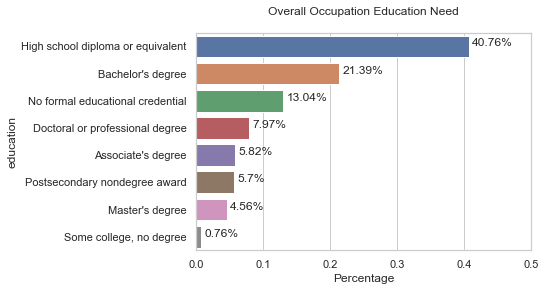

In [150]:
#Distribution of education need
df1 = item_data
df1['2019 Median annual wage'].replace('—','None',inplace = True)
df1 = df1['Typical entry-level education need'].value_counts(normalize=bool)
df2 = pd.DataFrame(df1)
df2 = df2.reset_index()
df2.rename(columns={'index': 'education', 'Typical entry-level education need': 'percentage'}, inplace=True)
plt.figure(figsize=(6,4))
bplot=sns.barplot(x='percentage',y='education', data=df2)
bplot.set_xlabel('Percentage')
for p in bplot.patches:
    _x = p.get_x() + p.get_width() + float(0.005)
    _y = p.get_y() + p.get_height()/2
    value = f'{round(float(p.get_width())*100,2)}%'
    bplot.text(_x, _y, value)
plt.xlim(0,0.5)
plt.title('Overall Occupation Education Need\n')
plt.show()

As we can see from the bar-hcart, the major portions of the occupations education need are High school and Beachelor's degree.

**1.2 Data Support: Density Plot**

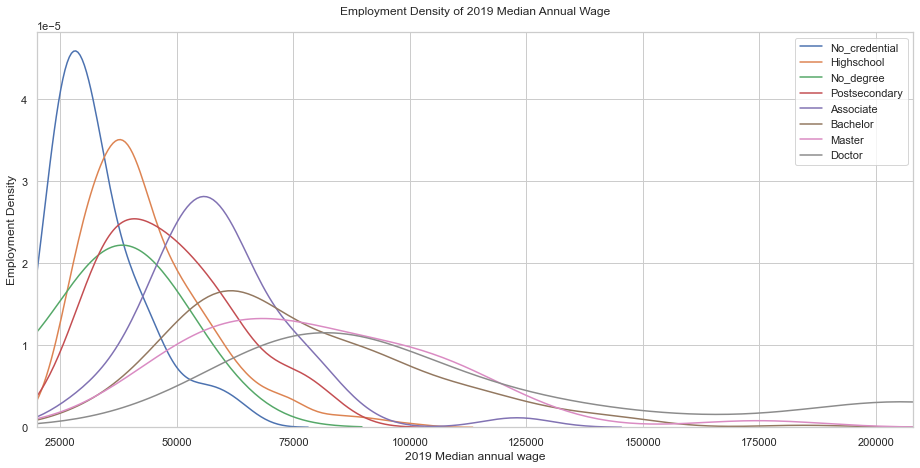

In [151]:
# Set Variable based on education entry-level
No_credential = item_data.loc[item_data['Typical entry-level education need'] == "No formal educational credential"]
Highschool = item_data.loc[item_data['Typical entry-level education need'] == "High school diploma or equivalent"]
No_degree = item_data.loc[item_data['Typical entry-level education need'] == "Some college, no degree"]
Associate = item_data.loc[item_data['Typical entry-level education need'] == "Associate's degree"]
Postsecondary = item_data.loc[item_data['Typical entry-level education need'] == "Postsecondary nondegree award"]
Bachelor = item_data.loc[item_data['Typical entry-level education need'] == "Bachelor's degree"]
Master = item_data.loc[item_data['Typical entry-level education need'] == "Master's degree"]
Doctor = item_data.loc[item_data['Typical entry-level education need'] == "Doctoral or professional degree"] 
# Set figure size
dims = (15.7, 7.27)
fig, ax = plt.subplots(figsize=dims)
# Add kernel density estimate (KDE) lines
sns.kdeplot(data=No_credential,x = '2019 Median annual wage')
sns.kdeplot(data=Highschool,x = '2019 Median annual wage')
sns.kdeplot(data=No_degree,x = '2019 Median annual wage')
sns.kdeplot(data=Postsecondary,x = '2019 Median annual wage')
sns.kdeplot(data=Associate,x = '2019 Median annual wage')
sns.kdeplot(data=Bachelor,x = '2019 Median annual wage')
sns.kdeplot(data=Master,x = '2019 Median annual wage')
sns.kdeplot(data=Doctor,x = '2019 Median annual wage')
plt.legend(['No_credential','Highschool','No_degree','Postsecondary','Associate','Bachelor','Master','Doctor'])
plt.ylabel('Employment Density')
plt.xlim(20000,208000)
plt.title('Employment Density of 2019 Median Annual Wage\n')
plt.show()

# If this part shows error, please update the seaborn to the lastest version, then the error will be solved



*   This graph clearly shows that different educational background requirements correspond to different annual wage distributions. Educational background requirements are listed in order from lowest to highest in the indicator legend. The density curve shifts sequentially to the right as the educational level increases. This shows that higher educational requirement can bring a greater likelihood of higher earnings.

*   In lower education segments (No formal educational credential, High school diploma or equivalent， Postsecondary nondegree award, Associate's degree, Some college with no degree), the annual wage for ‘Some college, no degree’ requirements and for high school requirements have a similar mean distribution, which is lower than ‘Postsecondary nondegree award’ and ’Associate's degree’. These information indicate that ‘Some college, no degree’ has similar competitiveness with ‘High school diploma or equivalent’ in the employment market.

*   However, education is no longer a significant factor in earnings in higher education segments (bachelor's, master's and doctoral degrees). The distribution of higher education requirement is more dispersed than that of lower education requirement. The annual wage distribution does not differ significantly in the higher education segments. This suggests that the increase in annual wage brought by education becomes less pronounced as education increases in the employment market.




**1.3 Hypothesis testing: one-way ANOVA**



Ho: μ1=μ2=μ3=...=μk (where μ = group mean,and k = number of groups)

Ha: There are at least two group means that are statistically significantly different from each other. 

In [153]:
df4 = item_data.filter(['Typical entry-level education need','2019 Median annual wage'])
df4.rename(columns={'Typical entry-level education need':'education', '2019 Median annual wage': 'wage'},inplace=True)
df4

# Fit the ANOVA model to data
model = smf.ols('wage ~ education', data=df4).fit()
ANOVA = sm.stats.anova_lm(model, type=2)
ANOVA


,df,sum_sq,mean_sq,F,PR(>F)
education,7.0,3.811297e+11,5.444709e+10,108.566658,8.033246e-111
Residual,782.0,3.921796e+11,5.015084e+08,NaN,NaN


As the result shown above, F statistic is about 108.5667 and p-value is 8.0332e-111.

Since the P-value as shown in the one-way ANOVA test is 8.0332e-111, which is apparently lower than 0.05, we reject the null hypothesis and conclude that there are at least two groups' wage mean in these 8 different level of education are significantly different from each other. Therefore, in the next, we are going to see whether each level of education has significantly different from each other and how much differences are they.


**Find out which pair of education degree are significantly different from each other**

In [152]:
#Multile comparison of different education groups for median annual wage
multi_compared = multi.MultiComparison(df4['wage'], df4['education'])
result = multi_compared.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Associate's degree,Bachelor's degree,17377.5444,0.001,6059.2026,28695.8862,True
Associate's degree,Doctoral or professional degree,50986.4286,0.001,37787.1589,64185.6983,True
Associate's degree,High school diploma or equivalent,-14684.2547,0.001,-25411.8628,-3956.6465,True
Associate's degree,Master's degree,22013.6111,0.001,6868.8438,37158.3784,True
Associate's degree,No formal educational credential,-26511.6019,0.001,-38580.8844,-14442.3195,True
Associate's degree,Postsecondary nondegree award,-10116.7778,0.3825,-24386.6922,4153.1366,False
Associate's degree,"Some college, no degree",-25993.3333,0.1317,-55534.8627,3548.196,False
Bachelor's degree,Doctoral or professional degree,33608.8842,0.001,23562.3513,43655.4171,True
Bachelor's degree,High school diploma or equivalent,-32061.799,0.001,-38526.6021,-25596.9959,True
Bachelor's degree,Master's degree,4636.0667,0.9,-7856.9745,17129.1079,False


For the results of reject shows True, the test reject the null; 

For the results of reject shows False, the test accept the null hypothesis, which indicated there are no significant diference between these two groups. 



**Therefore, we can see that there are NO significant difference between following pairs of education groups:** 
  
  Associate's degree vs. Postsecondary nondegree award

  Associate's degree vs. Some college, no degree

  Bachelor's degree vs. Master's degree

  High school diploma or equivalent vs. Postsecondary nondegree award

  High school diploma or equuivalent vs. Som college, no degree

  No formal educational credential vs. Som college, no degree

  Postsecondary nondegree award vs. Som college, no degree


**Conversely,** there is a significant difference in the effect of other different levels of educational degrees on median annual wage. 











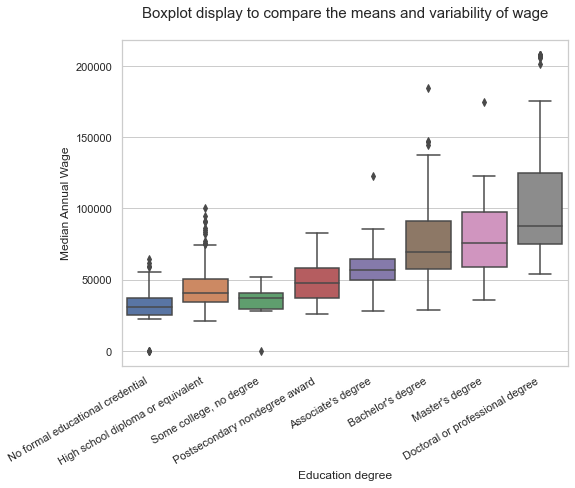

In [138]:
plt.figure(figsize=(8,6))
sns.boxplot(x='education', y='wage',data=df4, order=['No formal educational credential','High school diploma or equivalent',
                                                     'Some college, no degree','Postsecondary nondegree award',
                                                     "Associate's degree","Bachelor's degree",
                                                     "Master's degree","Doctoral or professional degree"])
plt.xlabel('Education degree')
plt.ylabel('Median Annual Wage')
plt.xticks(rotation=30, ha="right")
plt.title('Boxplot display to compare the means and variability of wage\n', fontsize=15)
plt.show()

The boxplot above can help us to visually understand the impact of different education levels on median annual wage and the results from Tukey HSD table. For example, occupations required education levels of Bachelor's degree and Master's degree provide a very similar range of wages, which indicated that the candiates with a master's degree do not have significant wage advantage over those with a bachelor's degree, unless they continue to study hard and earn a Ph.D. 

# Part 2. Work Experience

For the listed occupations in general, the higher the threshold of years of Work Experience, the higher the Median Wage

**2.1 Work Experience Attribute Composition: Pie Chart**

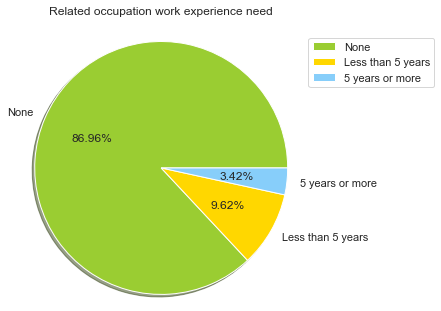

In [148]:
# Related occupation work experience need
df1 = item_data.copy()
df1['Related occupation work experience need'].replace('—','None',inplace = True)
df1 = df1['Related occupation work experience need'].value_counts(normalize=bool)
df3 = pd.DataFrame(df1)
df3.reset_index()
label = ['None','Less than 5 years','5 years or more']
data = df3['Related occupation work experience need'].copy()
py.pie_chart(data,label,f'Related occupation work experience need\n')



Based on this pie chart, we learned that the majority of occupations (86.96%) in the U.S. do not require work experience, while a certain number of occupations (13.04%) still require work experience.

**2.2 Data Support: Bar Plot**

Prove a basic distribution in different work experiences

In [163]:
# Two categories in work experiences required 
workexp = item_data.copy()
workexp['Related occupation work experience need'].replace('Less than 5 years','Experience required',inplace = True)
workexp['Related occupation work experience need'].replace('5 years or more','Experience required',inplace = True)
workexp['Related occupation work experience need'].replace('None','Experience not required',inplace = True)
# Check the two categories
workexp['Related occupation work experience need'].unique()
# Check the all counts of each categories
required = workexp.loc[workexp['Related occupation work experience need'] == 'Experience required']
not_required = workexp.loc[workexp['Related occupation work experience need'] == 'Experience not required']
print(f'There are {required.shape[0]} occupations with work experience requirements and {not_required.shape[0]} with no requirements.')

There are 103 occupations with work experience requirements and 687 with no requirements.


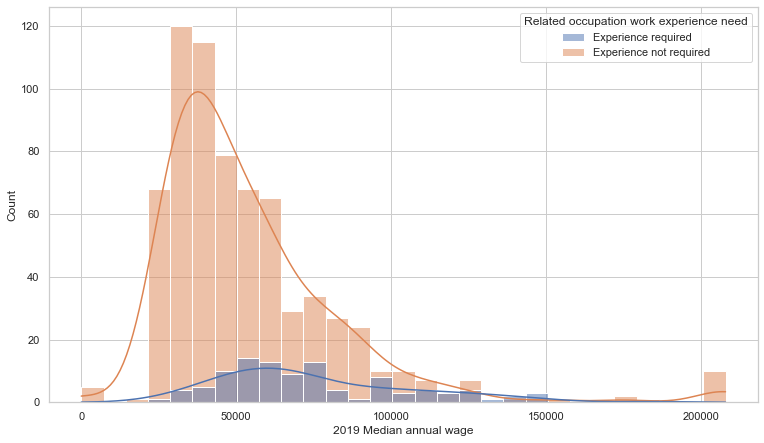

In [155]:
# Set figure size
dims = (12.7, 7.27)
fig, ax = plt.subplots(figsize=dims)
sns.histplot(data = workexp, x = '2019 Median annual wage',hue = 'Related occupation work experience need',kde=True)
plt.show()



*   This chart shows the distribution of median annual wage for 
occupations with relevant work experience requirements and for occupations without work experience requirements.

*   There are 103 occupations with work experience requirements and 687 with no requirements. Except for some outliers, their distributions are roughly normal. The mean value of earnings for positions without requirements is lower than for positions with requirements. Hypothesis testing for validation is still necessary in the next step.


**2.3 Hypothesis testing: Z-test**


According to the analysis above, occupations that require work experiences shows a higher wage level than the occupations that not require work experience. Thus we could make a hypothesis test to explore to what extent could we believe that the wage level of occupation with work experience requirement(Bwage) is higher than that of occupation without work experience(Hwage). 

Ho: Required_wage <= Not_required_wage

Ha: Required_wage > Not_required_wage

Since the degree of freedom for this dataset is greater than 30, we use z-test here. 

In [141]:

Required = workexp.loc[workexp['Related occupation work experience need']=='Experience required','2019 Median annual wage']
Not_required = workexp.loc[workexp['Related occupation work experience need']=='Experience not required','2019 Median annual wage']
weightstats.ztest(Required, Not_required, alternative='larger')

(6.6137263865273095, 1.87382075916609e-11)

As the result shown above, z-score is 6.61 and p-value is 1.87e-11.

Since the P-value is apparently lower than 0.05, there is 95% significance to reject the null hypothesis. Therefore, we can conclude that the overall level of wage of occupations that require work experience is higher than that of occupations that not require.

# Part 3. A combination of education and work experience

For the listed occupations in general, Education level and Work Experience combine to influence Median Annual Wages

**3.1 Data Support: Violin Plot**

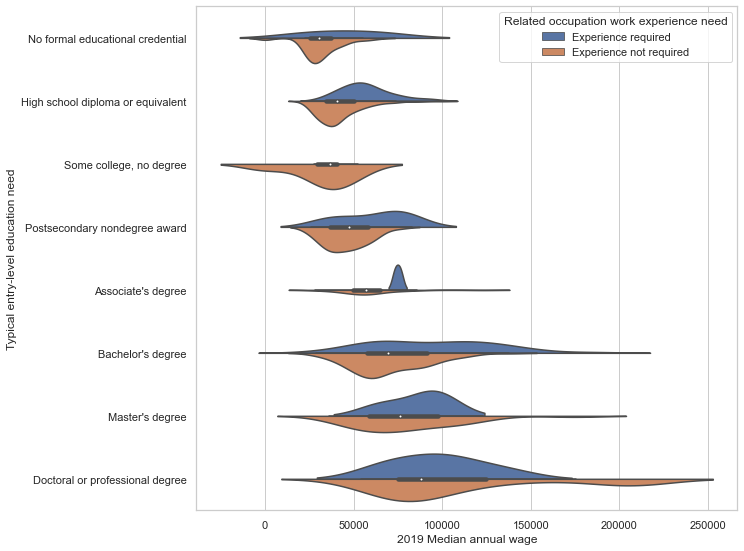

In [142]:
dims = (9.7, 9.27)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(x="2019 Median annual wage", y="Typical entry-level education need", hue = 'Related occupation work experience need', data=workexp, split = True,
               order = ['No formal educational credential',"High school diploma or equivalent","Some college, no degree","Postsecondary nondegree award",
                        "Associate's degree","Bachelor's degree","Master's degree","Doctoral or professional degree"])
plt.show()

*   The mean distribution of the median annual wage among occupations with different education as the threshold basically shows a positive correlation with the education requirement. As the educational requirement rises, the mean value of annual wage of occupations also rises. Depending on the degree threshold, earnings range from $400,000  to  $900,000. Some higher-education (master's and doctoral) occupations with work experience requirements can have a mean annual wage distribution of $100,000.


*   The distribution of annual wage for bachelor's, master's and doctoral degrees has a wider distribution of median annual wage in positions that do not require work experience compared to other degrees. Among them, "Doctoral or professional degree" exceeds $100,000 per year in the standard deviation range. This indicates that higher education can bring better job wage in the early stage of career.


*   On the other hand, the annual income distribution between Master's and Bachelor's degree does not change. By comparing their mean annual earnings under different work experience requirements, we can see that the annual wage advantage of occupations with master's degree as threshold is mostly concentrated in positions requiring work experience. The annual wage advantage of the occupation with bachelor's degree as threshold is mostly concentrated in positions not requiring work experience. Compared with a bachelor's degree, a master's degree certainly brings an increase in annual income, but in general, it mostly requires longer work experience and job advancement to be reflected.


*   Most occupations with associate's degree requirement also require work experience. However, its salary level is quite concentrated, with an annual wage of less than $100,000 among all occupations. For most occupations with associate's degree requirement, this degree requires limited career advancement


*   'Some college, no degree' signifies the achievement of a high school diploma or equivalent plus the completion of one or more postsecondary courses that did not result in a degree or award. It corresponds to a specific occupational distribution. And the job market does not require work experience for people with such positions. First of all, the job market does not require people that works in such positions to have work experience. Secondly, a portion of careers with this educational background give significantly lower income than the market rate. We believe that there is a high percentage of outliers in this part of the data in this figure. Therefore consider it separately. After analysis, we believe that these positions are hiring targeting undeclared students attending nondegree colleges.


**3.2 Hypothesis testing: ANOVA**  


> ***Are Education and Working experience really impacting wage?***

Ho: Education, Experience and Edu+Exp have no impact to wage.

Ha: Education, Experience and Edu+Exp will impact wage.




    
    

In [143]:
features=['2019 National Employment Matrix title','2019 Employment','Percent of Employment Change','2019 Percent of self employed','Annual average of occupational openings','2019 Median annual wage','Typical entry-level education need','Related occupation work experience need','Typical on-the-job training needed to attain competency in the occupation']
cldata=item_data[features]
cldata.set_axis(['Title','Emp','Employment Change','Self Employed','Openings','Wage','Education','Experience','Training'], axis='columns', inplace=True)
cl_data=cldata[['Emp','Employment Change','Self Employed','Openings','Wage']]

#perform two-way ANOVA
model_ANOVA = ols('Wage ~ C(Education) + C(Experience) + C(Education):C(Experience)', data=cldata).fit()
sm.stats.anova_lm(model_ANOVA)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),7.0,3.811297e+11,5.444709e+10,123.135241,4.608717e-121
C(Experience),2.0,3.778447e+10,1.889223e+10,42.725877,2.533108e-18
C(Education):C(Experience),14.0,1.895671e+10,1.354051e+09,3.062264,1.216657e-04
Residual,770.0,3.404733e+11,4.421731e+08,NaN,NaN


The P value<0.05 suggests that both education and working experience and their synegy affect the wage.

# Part 4. Regression of Median Annual Wages

  
Quantify all characteristics, find an correlation perdicting model with prediction tool: Random Forest, to see how education background, work experience requirement and the rest of the characteristics altogether influencing the annual wage in all occupation.


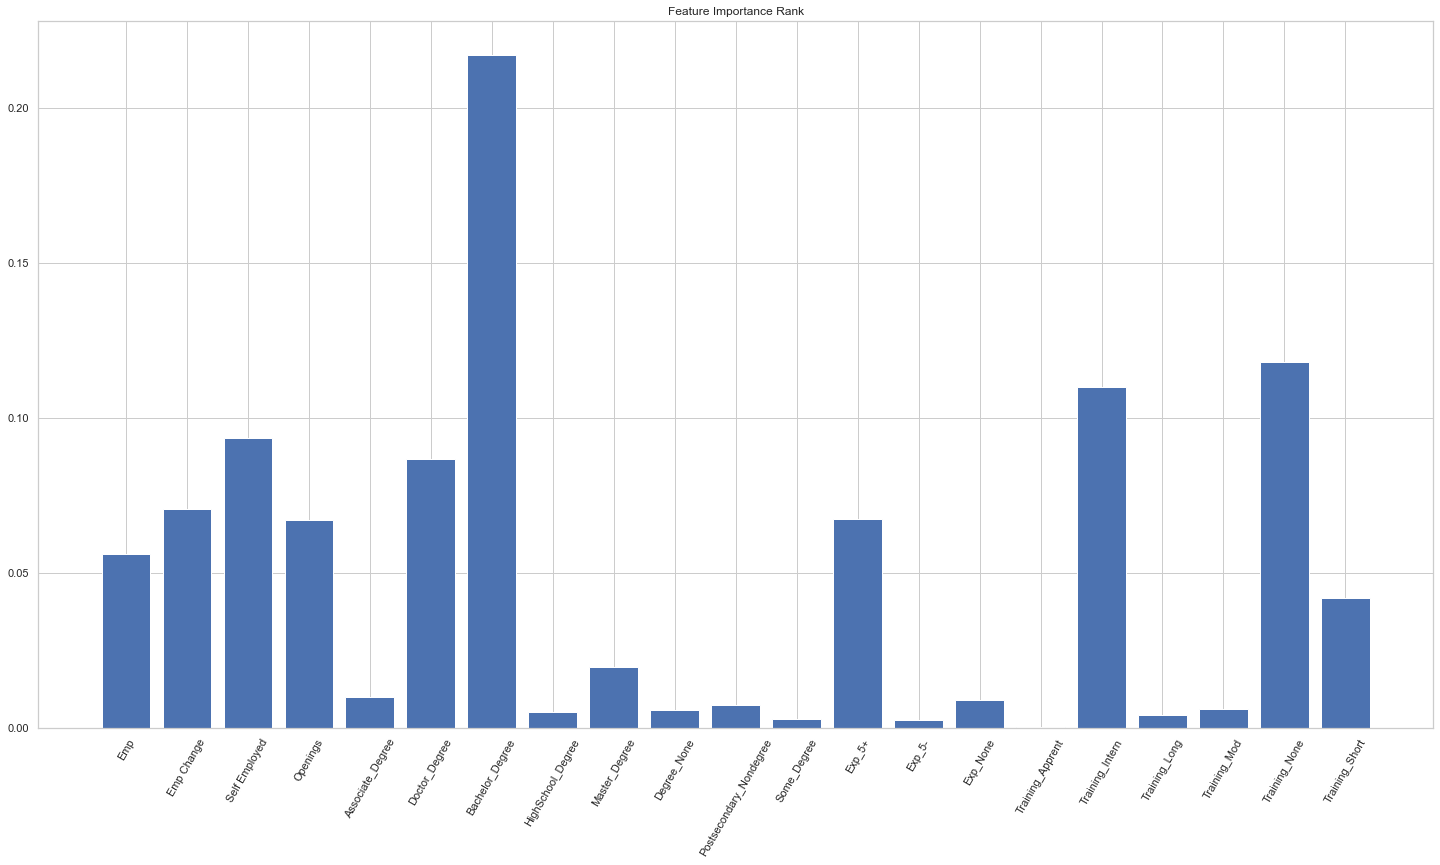

The accuracy score of this correlation model is 0.6353, which indicates a relatively good fit.


In [166]:
# Get column 'Education' one hotted 
values = np.array(cldata['Education'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# One hot encoding
oh_df=pd.DataFrame(onehot_encoded)
oh_df.set_axis(['Is_Associate','Is_Doctor','Is_Bachelor','Is_HighSchool','Is_Master','Is_None','Is_Postsecondary','Is_Some'],axis='columns',inplace=True)
# Get column 'experience' one hotted 
values = np.array(cldata['Experience'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_2 = onehot_encoder.fit_transform(integer_encoded)
oh_df=oh_df.join(pd.DataFrame(onehot_encoded_2))

oh_df.set_axis(['Associate_Degree','Doctor_Degree','Bachelor_Degree','HighSchool_Degree','Master_Degree','Degree_None','Postsecondary_Nondegree','Some_Degree','Exp_5+','Exp_5-','Exp_NotRequire'],axis='columns',inplace=True)
# Get column 'traning' one hotted 
values = np.array(cldata['Training'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_2 = onehot_encoder.fit_transform(integer_encoded)
oh_df=oh_df.join(pd.DataFrame(onehot_encoded_2))
oh_df.set_axis(['Associate_Degree','Doctor_Degree','Bachelor_Degree','HighSchool_Degree','Master_Degree','Degree_None','Postsecondary_Nondegree','Some_Degree','Exp_5+','Exp_5-','Exp_NotRequire','Training_Apprenticeship','Training_Intern','Training_Long','Training_Mod','Training_None','Training_Short'],axis='columns',inplace=True)
cl_data.set_index(oh_df.index,inplace=True)
onehot_data=cl_data.join(oh_df )
X=onehot_data.drop(columns=['Wage'],axis=1)
y=onehot_data['Wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=21, max_depth=15) 
model.fit(X_train, y_train) 
predicts = model.predict(X_test) 

r2=r2_score(y_test,predicts)

importance = model.feature_importances_
plt.figure(figsize=(25,13))
plt.bar([x for x in range(len(importance))], importance)  
plt.title('Feature Importance Rank')
plt.xticks( range(0,21), ('Emp','Emp Change','Self Employed','Openings','Associate_Degree','Doctor_Degree','Bachelor_Degree','HighSchool_Degree','Master_Degree','Degree_None','Postsecondary_Nondegree','Some_Degree','Exp_5+','Exp_5-','Exp_None','Training_Apprent','Training_Intern','Training_Long','Training_Mod','Training_None','Training_Short'),rotation=60)
plt.show()  
print(f'The accuracy score of this correlation model is {r2.round(4)}, which indicates a relatively good fit.')

The bar chart above shows the importance to the wages. Categorical data have been one-hotted. The first 4 features can be treated as the employment itself- the income is highly related to the job itself. For Education, only when someone has reached an at least bachelor degree can the wage increases significantly. 5 years+ working experience also add to it. For training experiences of the regression, we can see that moderate and long term training don't contribute to wages.


# Conclusion

Based on our analysis above, here are what we found:
* The overall wage trend increases with the degree requirements of the occupation, and it is worth noting that undergraduate degrees and PhDs have a more significatn impact on the level of wage increases. 

* From an overall perspective, occupations that require work experience do offer higher wage lelves compared to those that do not. 

* After analyzing the joint effect of education and work experience on wages, we found that work experience was valued more for positions with low education requriements, while the work experience for position with high degree requirements had a limited impact on wage gains. 

* Those occupations that require mid-term or long-term internships do not pay more wages for longer internships. 